In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('Churn_modelling.csv')

In [2]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.size

140000

In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
num_data=data.select_dtypes(exclude='object')

In [16]:
import seaborn as sb
import matplotlib.pyplot as plt

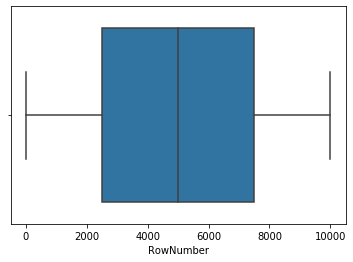

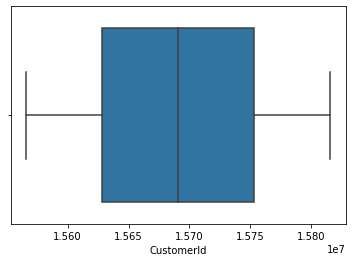

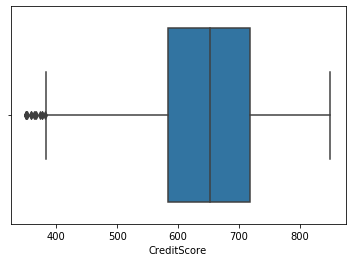

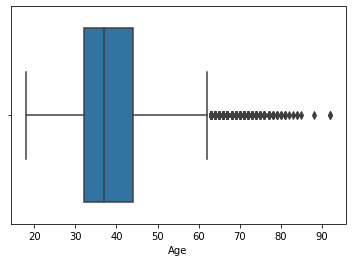

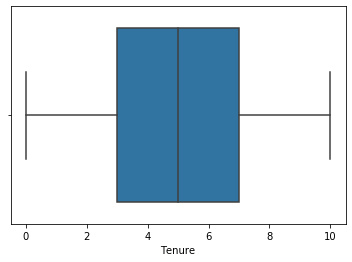

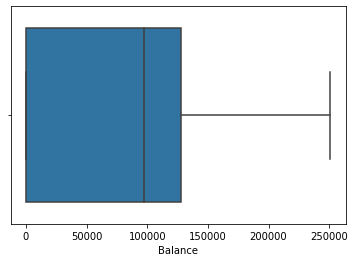

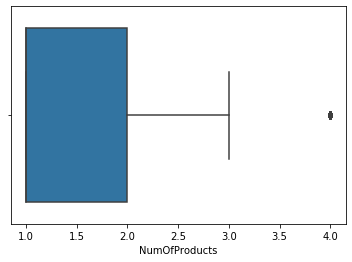

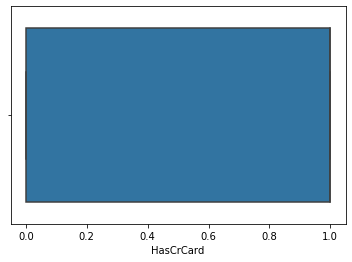

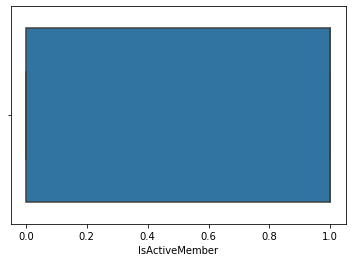

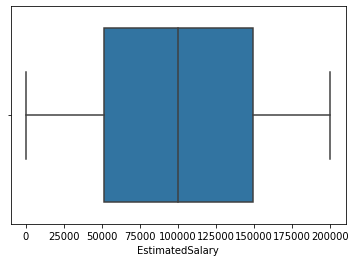

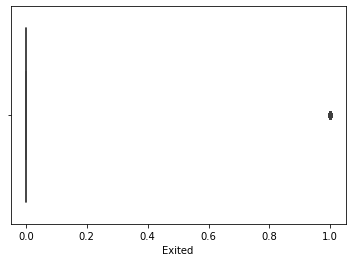

In [17]:
for i in num_data.columns:
    sb.boxplot(num_data[i])
    plt.show()

In [18]:
for i in num_data.columns:
    q1=num_data[i].quantile(0.25)
    q3=num_data[i].quantile(0.75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    num_data[i]=num_data[i].replace(num_data[num_data[i]>ub][i],num_data[i].quantile(0.9))
    num_data[i]=num_data[i].replace(num_data[num_data[i]<lb][i],num_data[i].quantile(0.01))

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

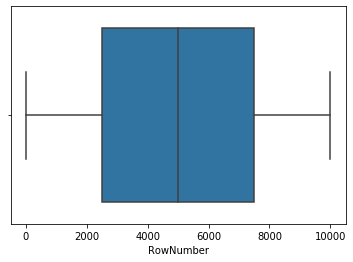

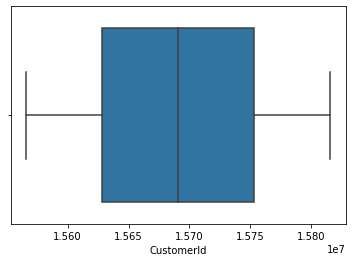

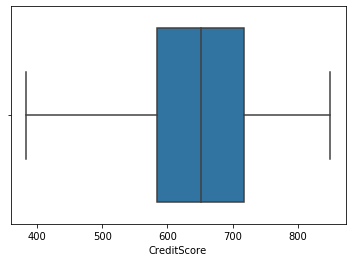

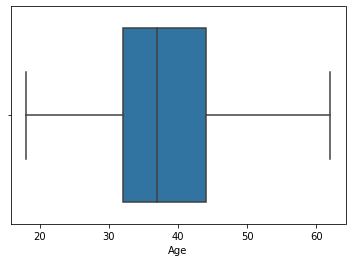

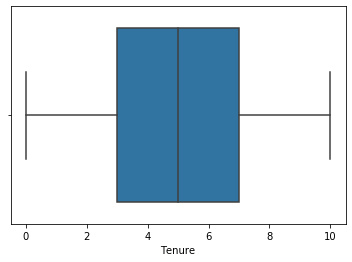

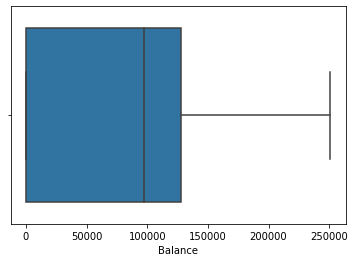

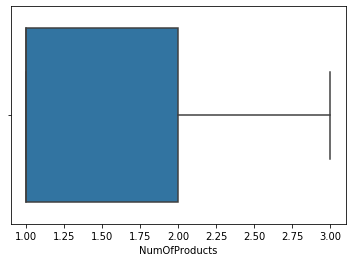

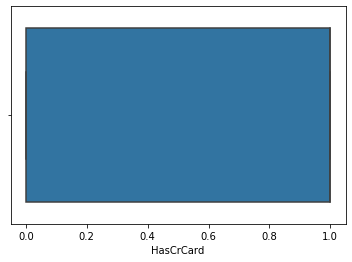

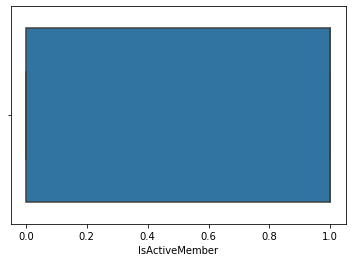

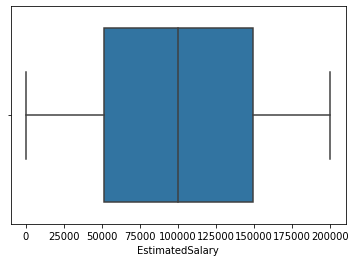

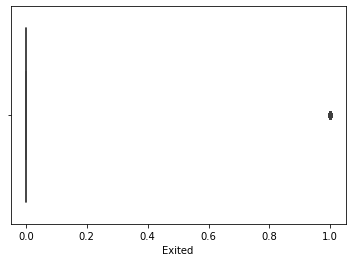

In [19]:
for i in num_data.columns:
    sb.boxplot(num_data[i])
    plt.show()

In [20]:
cat_data=data.select_dtypes(include='object')

In [21]:
cat_data=pd.get_dummies(cat_data,drop_first=True)

In [22]:
cat_data.head()

,Surname_Abbie,Surname_Abbott,Surname_Abdullah,Surname_Abdulov,Surname_Abel,Surname_Abernathy,Surname_Abramov,Surname_Abramova,Surname_Abramovich,Surname_Abramowitz,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
clean_data=pd.concat([num_data,cat_data],1)

In [28]:
clean_data.head(2)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,0,1,0


In [29]:
out=clean_data['Exited']
inp=clean_data.drop('Exited',1)

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=48)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf_mod=RandomForestClassifier(random_state=48)
rf_mod.fit(xtrain,ytrain)
ypred=rf_mod.predict(xtest)

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2386
           1       0.82      0.30      0.44       614

    accuracy                           0.84      3000
   macro avg       0.83      0.64      0.68      3000
weighted avg       0.84      0.84      0.81      3000



In [38]:
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

In [39]:
kf=KFold(n_splits=5,shuffle=True,random_state=48)
param=[5,10,15,20,25,30,40]
param1=[5,8,12,20,25,30]
be=[]
ve=[]
for i in param:
    for j in param1:
        rf_mod=RandomForestClassifier(n_estimators=i,max_depth=j,random_state=48)
        res=cross_val_score(rf_mod,inp,out,cv=kf,scoring='accuracy')
        print('The number of trees:',i,'Max_Depth:',j)
        print('The Bias Error: ',1-np.mean(res))
        print('The Variance Error: ',np.std(res))
        be.append(1-np.mean(res))
        ve.append(np.std(res))
    

The number of trees: 5 Max_Depth: 5
The Bias Error:  0.2037000000000001
The Variance Error:  0.008103085831953172
The number of trees: 5 Max_Depth: 8
The Bias Error:  0.2026
The Variance Error:  0.009525754563287915
The number of trees: 5 Max_Depth: 12
The Bias Error:  0.2005
The Variance Error:  0.009919677414109776
The number of trees: 5 Max_Depth: 20
The Bias Error:  0.1965
The Variance Error:  0.00765506368360185
The number of trees: 5 Max_Depth: 25
The Bias Error:  0.19290000000000007
The Variance Error:  0.008563877626402636
The number of trees: 5 Max_Depth: 30
The Bias Error:  0.1867000000000001
The Variance Error:  0.010800925886237708
The number of trees: 10 Max_Depth: 5
The Bias Error:  0.2037000000000001
The Variance Error:  0.008103085831953172
The number of trees: 10 Max_Depth: 8
The Bias Error:  0.2037000000000001
The Variance Error:  0.008103085831953172
The number of trees: 10 Max_Depth: 12
The Bias Error:  0.2027000000000001
The Variance Error:  0.009384028985462494
Th